In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler

Question 1: Analyse and visualise the given data sets by reporting the distribution of class, distribution of features and any other visualisation you find appropriate.

In [51]:
#Renaming the columns, and chaning the sex of Abalones to numeric values that follows the same strucutre from the previous assessment
data = pd.read_csv('./abalone/abalone.data', sep = ',' , header = None)
data[0] = np.where(data[0] == "M", 0, np.where(data[0] == "F", 1, 2))
rename_columns = ["Sex", "Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight", "Rings"]
data = data.set_axis(rename_columns, axis='columns')
#I got one more in me, Do you?

<Figure size 640x480 with 0 Axes>

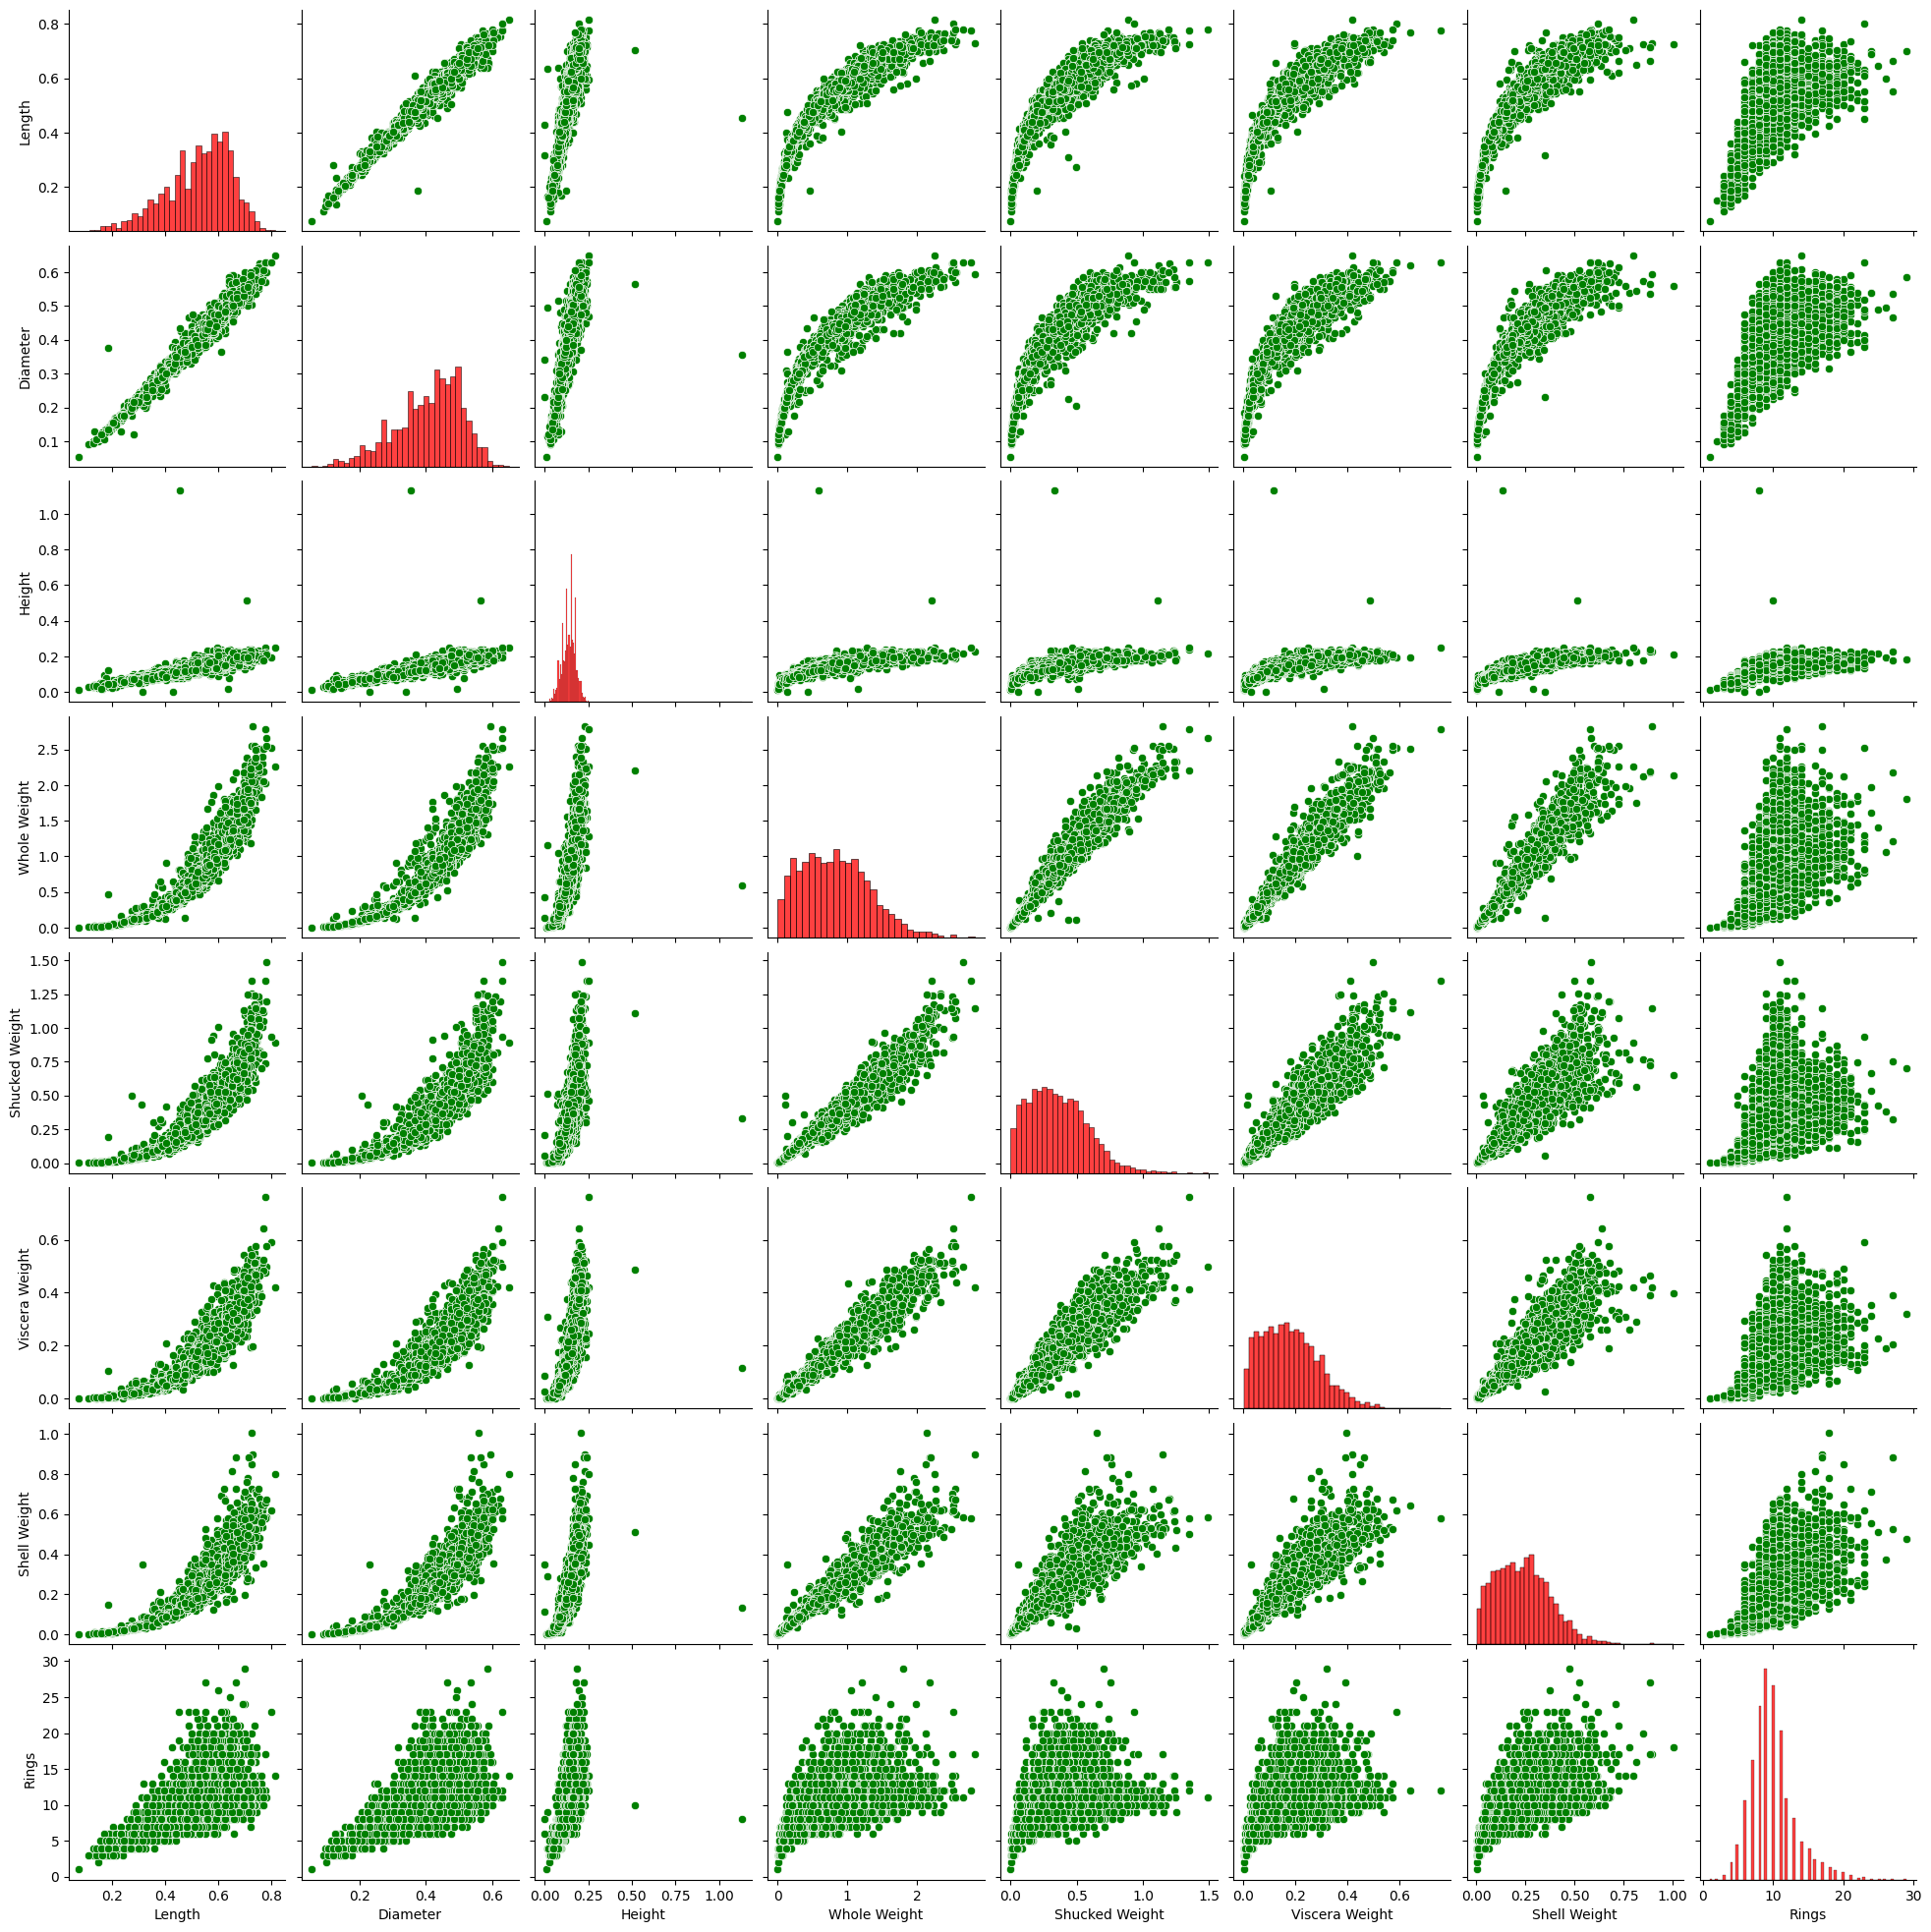

In [52]:
plt.figure()
sns.pairplot(data[["Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight", "Rings"]], diag_kws={'color': 'red'}, plot_kws={'color': 'green'})
plt.savefig('./figures/bivariate.jpeg')
plt.show() 

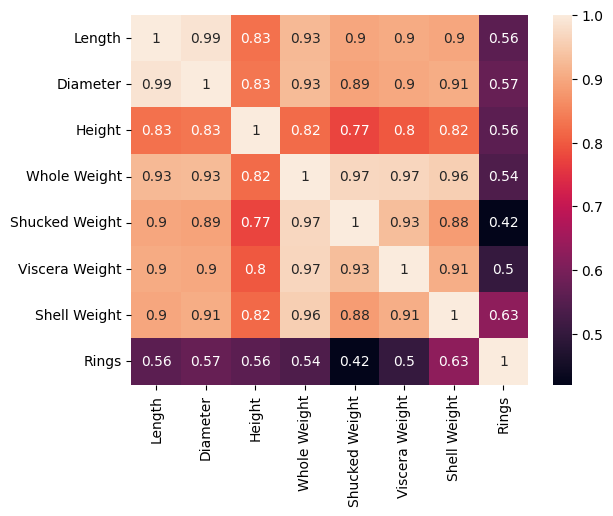

In [53]:
names = ["Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight", "Rings"]

data_no_sex = data[["Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight", "Rings"]].T
corr_matrix = np.corrcoef(data_no_sex)

plt.figure()

heatmapped = sns.heatmap(corr_matrix, xticklabels=names, yticklabels=names, annot=True)
plt.savefig('./figures/corrheatmap')
plt.show()

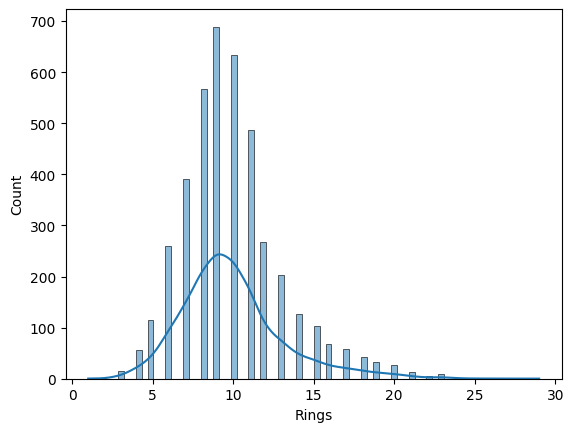

In [54]:
plt.figure()

sns.histplot(data=data, x="Rings", kde=True)
plt.savefig('./figures/RingsFrequency')

plt.show()

Question 2: Investigate the effect of the number of hidden neurons (eg. 5, 10, 15, 20) for a single hidden layer (using SGD) 

In [68]:
#Preparing the data by applying the domain and range to an extra column on the dataframe
data['AgeClassifcation'] = np.where((data['Rings'] >= 0) & (data['Rings'] < 7), "Class 1",
                          np.where((data['Rings'] >= 7) & (data['Rings'] < 10), "Class 2",
                                   np.where((data['Rings'] >= 10) & (data['Rings'] < 15), "Class 3", "Class 4")))
#test to see if the data looks good and appended correctly.
data.head()


,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,AgeClassifcation
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,Class 4
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Class 2
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Class 2
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,Class 3
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Class 2


In [92]:
#Splitting the X and Y targetted values, we do not need sex, so we drop that 
cleaned_data = data[["Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight", "Rings", "AgeClassifcation"]]
X = cleaned_data[["Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscera Weight", "Shell Weight"]].values
y = cleaned_data[["AgeClassifcation"]].values


In [97]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)


In [111]:
hidden_level_neurons = [6, 8, 9, 10, 12]

scaler = MinMaxScaler()
#loop through the array of hidden level neurons we set above
for neuron in hidden_level_neurons:
#neuron gets passed inside the hidden layer size
#using the SGD as the solver in the parameter, random variable state is saved for future run tests.
    MLP = MLPClassifier(hidden_layer_sizes=(neuron), 
                        activation='relu',
                        solver='sgd',
                        learning_rate='constant',
                        max_iter=1000,
                        random_state=40)

    MLP.fit(scaler.fit_transform(X_train), y_train.ravel())

    predict_train = MLP.predict(scaler.transform(X_train))
    predict_test = MLP.predict(scaler.transform(X_test))
#calculating the conufsion and classification report
    print(confusion_matrix(y_train.ravel(), predict_train.ravel()))
    print(classification_report(y_train.ravel(), predict_train.ravel()))
#calculating the accuracy
    accuracy = MLP.score(scaler.transform(X_test), y_test)
    print(f"Total Hidden Level of Neurons: {neuron}, Accuracy of Model: {accuracy}")

[[188 135   4   0]
 [ 49 742 363   0]
 [  8 371 814   0]
 [  0  62 187   0]]
              precision    recall  f1-score   support

     Class 1       0.77      0.57      0.66       327
     Class 2       0.57      0.64      0.60      1154
     Class 3       0.60      0.68      0.64      1193
     Class 4       0.00      0.00      0.00       249

    accuracy                           0.60      2923
   macro avg       0.48      0.48      0.47      2923
weighted avg       0.55      0.60      0.57      2923

Total Hidden Level of Neurons: 6, Accuracy of Model: 0.5933014354066986


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[190 132   5   0]
 [ 61 731 362   0]
 [ 10 339 844   0]
 [  0  57 192   0]]
              precision    recall  f1-score   support

     Class 1       0.73      0.58      0.65       327
     Class 2       0.58      0.63      0.61      1154
     Class 3       0.60      0.71      0.65      1193
     Class 4       0.00      0.00      0.00       249

    accuracy                           0.60      2923
   macro avg       0.48      0.48      0.48      2923
weighted avg       0.56      0.60      0.58      2923

Total Hidden Level of Neurons: 8, Accuracy of Model: 0.6068580542264753


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[199 123   5   0]
 [ 71 774 309   0]
 [ 12 336 844   1]
 [  0  43 200   6]]
              precision    recall  f1-score   support

     Class 1       0.71      0.61      0.65       327
     Class 2       0.61      0.67      0.64      1154
     Class 3       0.62      0.71      0.66      1193
     Class 4       0.86      0.02      0.05       249

    accuracy                           0.62      2923
   macro avg       0.70      0.50      0.50      2923
weighted avg       0.65      0.62      0.60      2923

Total Hidden Level of Neurons: 9, Accuracy of Model: 0.594896331738437
[[195 127   5   0]
 [ 64 749 341   0]
 [ 10 347 836   0]
 [  0  56 193   0]]
              precision    recall  f1-score   support

     Class 1       0.72      0.60      0.65       327
     Class 2       0.59      0.65      0.62      1154
     Class 3       0.61      0.70      0.65      1193
     Class 4       0.00      0.00      0.00       249

    accuracy                           0.61      2923
   macro avg  

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[188 135   4   0]
 [ 57 754 343   0]
 [  8 380 805   0]
 [  0  65 184   0]]
              precision    recall  f1-score   support

     Class 1       0.74      0.57      0.65       327
     Class 2       0.57      0.65      0.61      1154
     Class 3       0.60      0.67      0.64      1193
     Class 4       0.00      0.00      0.00       249

    accuracy                           0.60      2923
   macro avg       0.48      0.48      0.47      2923
weighted avg       0.55      0.60      0.57      2923

Total Hidden Level of Neurons: 12, Accuracy of Model: 0.5669856459330144


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Question 3) Investigate the effect of learning rate (using SGD) for the selected data set (using the optimal number of hidden neurons)

In [116]:
learning_rates = [0.0000001,  0.00001, 0.0001, 0.001, 0.01, 0.1]

scaler = MinMaxScaler()
#loop through the array of hidden level neurons we set above
for lr in learning_rates:
#neuron gets passed inside the hidden layer size
#using the SGD as the solver in the parameter, random variable state is saved for future run tests.
    MLP = MLPClassifier(hidden_layer_sizes=(10), 
                        activation='relu',
                        solver='sgd',
                        learning_rate_init=lr,
                        max_iter=1000,
                        random_state=40)

    MLP.fit(scaler.fit_transform(X_train), y_train.ravel())

    predict_train = MLP.predict(scaler.transform(X_train))
    predict_test = MLP.predict(scaler.transform(X_test))
#calculating the conufsion and classification report
    print(confusion_matrix(y_train.ravel(), predict_train.ravel()))
    print(classification_report(y_train.ravel(), predict_train.ravel()))
#calculating the accuracy
    accuracy = MLP.score(scaler.transform(X_test), y_test)
    print(f"The learning rate that was applied: {lr}, Accuracy of Model: {accuracy}")

[[324   3   0   0]
 [815 339   0   0]
 [449 744   0   0]
 [106 143   0   0]]
              precision    recall  f1-score   support

     Class 1       0.19      0.99      0.32       327
     Class 2       0.28      0.29      0.28      1154
     Class 3       0.00      0.00      0.00      1193
     Class 4       0.00      0.00      0.00       249

    accuracy                           0.23      2923
   macro avg       0.12      0.32      0.15      2923
weighted avg       0.13      0.23      0.15      2923

The learning rate that was applied: 1e-07, Accuracy of Model: 0.09649122807017543


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[   0  114  213    0]
 [   0 1053  101    0]
 [   0 1174   19    0]
 [   0  249    0    0]]
              precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00       327
     Class 2       0.41      0.91      0.56      1154
     Class 3       0.06      0.02      0.02      1193
     Class 4       0.00      0.00      0.00       249

    accuracy                           0.37      2923
   macro avg       0.12      0.23      0.15      2923
weighted avg       0.18      0.37      0.23      2923

The learning rate that was applied: 1e-05, Accuracy of Model: 0.3413078149920255


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/neur

[[  6 314   7   0]
 [  0 689 465   0]
 [  0 271 922   0]
 [  0  43 206   0]]
              precision    recall  f1-score   support

     Class 1       1.00      0.02      0.04       327
     Class 2       0.52      0.60      0.56      1154
     Class 3       0.58      0.77      0.66      1193
     Class 4       0.00      0.00      0.00       249

    accuracy                           0.55      2923
   macro avg       0.52      0.35      0.31      2923
weighted avg       0.55      0.55      0.49      2923

The learning rate that was applied: 0.0001, Accuracy of Model: 0.5733652312599681
[[195 127   5   0]
 [ 64 749 341   0]
 [ 10 347 836   0]
 [  0  56 193   0]]
              precision    recall  f1-score   support

     Class 1       0.72      0.60      0.65       327
     Class 2       0.59      0.65      0.62      1154
     Class 3       0.61      0.70      0.65      1193
     Class 4       0.00      0.00      0.00       249

    accuracy                           0.61      2923
   

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[196 124   5   2]
 [ 74 798 281   1]
 [ 13 311 847  22]
 [  0  18 176  55]]
              precision    recall  f1-score   support

     Class 1       0.69      0.60      0.64       327
     Class 2       0.64      0.69      0.66      1154
     Class 3       0.65      0.71      0.68      1193
     Class 4       0.69      0.22      0.33       249

    accuracy                           0.65      2923
   macro avg       0.67      0.56      0.58      2923
weighted avg       0.65      0.65      0.64      2923

The learning rate that was applied: 0.01, Accuracy of Model: 0.3803827751196172
[[212 109   5   1]
 [ 83 781 290   0]
 [ 14 291 878  10]
 [  0  18 193  38]]
              precision    recall  f1-score   support

     Class 1       0.69      0.65      0.67       327
     Class 2       0.65      0.68      0.66      1154
     Class 3       0.64      0.74      0.69      1193
     Class 4       0.78      0.15      0.26       249

    accuracy                           0.65      2923
   ma

Question 4) Investigate the effect on a different number of hidden layers (1, 2) with the optimal number of hidden neurons (from Part 3)

In [129]:
hidden_layers = [(8),  (8,8), (8,8,8), (8,8,8,8)]

scaler = MinMaxScaler()
#loop through the array of hidden level neurons we set above
for hl in hidden_layers:
#neuron gets passed inside the hidden layer size
#using the SGD as the solver in the parameter, random variable state is saved for future run tests.
    MLP = MLPClassifier(hidden_layer_sizes= hl, 
                        activation='relu',
                        solver='sgd',
                        learning_rate_init=lr,
                        max_iter=1000,
                        random_state=40)

    MLP.fit(scaler.fit_transform(X_train), y_train.ravel())

    predict_train = MLP.predict(scaler.transform(X_train))
    predict_test = MLP.predict(scaler.transform(X_test))
#calculating the conufsion and classification report
    print(confusion_matrix(y_train.ravel(), predict_train.ravel()))
    print(classification_report(y_train.ravel(), predict_train.ravel()))
#calculating the accuracy
    accuracy = MLP.score(scaler.transform(X_test), y_test)
    print(f"The hidden layers that were applied: {hl}, Accuracy of Model: {accuracy}")

[[218 103   3   3]
 [ 92 842 215   5]
 [ 16 383 695  99]
 [  0  30 112 107]]
              precision    recall  f1-score   support

     Class 1       0.67      0.67      0.67       327
     Class 2       0.62      0.73      0.67      1154
     Class 3       0.68      0.58      0.63      1193
     Class 4       0.50      0.43      0.46       249

    accuracy                           0.64      2923
   macro avg       0.62      0.60      0.61      2923
weighted avg       0.64      0.64      0.63      2923

The hidden layers that were applied: 8, Accuracy of Model: 0.18181818181818182
[[195 124   5   3]
 [ 59 702 388   5]
 [  9 210 909  65]
 [  0   5 158  86]]
              precision    recall  f1-score   support

     Class 1       0.74      0.60      0.66       327
     Class 2       0.67      0.61      0.64      1154
     Class 3       0.62      0.76      0.69      1193
     Class 4       0.54      0.35      0.42       249

    accuracy                           0.65      2923
   mac

Question 5) Investigate the effect of Adam and SGD on training and test performance. 

In [133]:
solvers = ["sgd", "adam"]

scaler = MinMaxScaler()
#loop through the array of hidden level neurons we set above
for function in solvers:
#neuron gets passed inside the hidden layer size
#using the SGD as the solver in the parameter, random variable state is saved for future run tests.
    MLP = MLPClassifier(hidden_layer_sizes= hl, 
                        activation='relu',
                        solver=function,
                        learning_rate_init=lr,
                        max_iter=1000,
                        random_state=40)

    MLP.fit(scaler.fit_transform(X_train), y_train.ravel())

    predict_train = MLP.predict(scaler.transform(X_train))
    predict_test = MLP.predict(scaler.transform(X_test))
#calculating the conufsion and classification report
    print(confusion_matrix(y_train.ravel(), predict_train.ravel()))
    print(classification_report(y_train.ravel(), predict_train.ravel()))
#calculating the accuracy
    accuracy = MLP.score(scaler.transform(X_test), y_test)
    print(f"The solver function used applied: {function}, Accuracy of Model: {accuracy}")

[[174 148   3   2]
 [ 34 911 207   2]
 [  3 416 753  21]
 [  0  41 155  53]]
              precision    recall  f1-score   support

     Class 1       0.82      0.53      0.65       327
     Class 2       0.60      0.79      0.68      1154
     Class 3       0.67      0.63      0.65      1193
     Class 4       0.68      0.21      0.32       249

    accuracy                           0.65      2923
   macro avg       0.69      0.54      0.58      2923
weighted avg       0.66      0.65      0.64      2923

The solver function used applied: sgd, Accuracy of Model: 0.4059011164274322
[[235  86   6   0]
 [108 770 276   0]
 [ 14 298 881   0]
 [  0  20 229   0]]
              precision    recall  f1-score   support

     Class 1       0.66      0.72      0.69       327
     Class 2       0.66      0.67      0.66      1154
     Class 3       0.63      0.74      0.68      1193
     Class 4       0.00      0.00      0.00       249

    accuracy                           0.65      2923
   macro

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
